# BANK NOTE AUTHENTICATION

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Dataset can be used for Binary Classification sample problems

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
### import csv data
df = pd.read_csv('Bank Note Authentication/BankNote_Authentication.csv')

In [34]:
### quick look at dataframe top 5 rows
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [35]:
### dataframe shape
df.shape 

(1372, 5)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [37]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


# EXPLORATORY DATA ANALYSIS

In [38]:
### any NULL values?
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

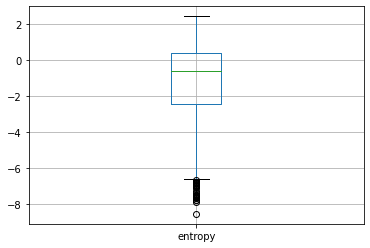

In [39]:
df.boxplot(column='entropy')

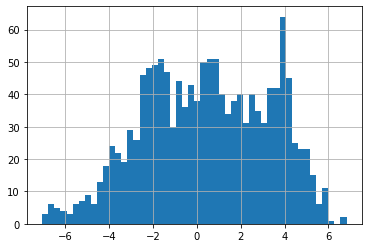

In [40]:
### variance distribution appears to have a good normal distribution ranging from -6 to +6
df['variance'].hist(bins=50)

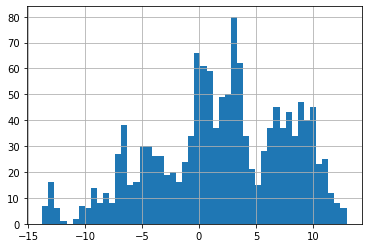

In [41]:
### skewness distribution appears to have a weak normal distribution ranging from -15 to +15
df['skewness'].hist(bins=50)

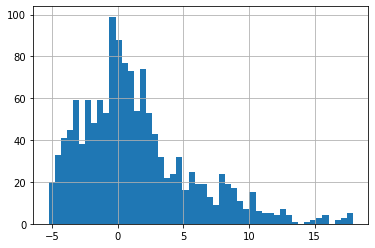

In [42]:
### curtosis distribution appears to have right skewed ranging from -5 to +20
df['curtosis'].hist(bins=50)

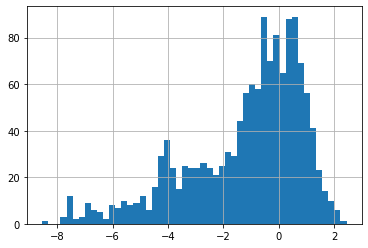

In [43]:
### entropy distribution appears to have left skewed ranging from -8 to +2
df['entropy'].hist(bins=50)

In [44]:
print('Skewness in column-variance : '+str(df['variance'].skew()))
print('Skewness in column-skewness : '+str(df['skewness'].skew()))
print('Skewness in column-curtosis : '+str(df['curtosis'].skew()))
print('Skewness in column-entropy : '+str(df['entropy'].skew()))

Skewness in column-variance : -0.14938770055109987
Skewness in column-skewness : -0.39410347444624066
Skewness in column-curtosis : 1.088568543275335
Skewness in column-entropy : -1.0222430438083978


In [45]:
def outlier(df, column):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    outlier= df[(df[column] > 1.5* IQR + df[column].quantile(0.75)) | (df[column] < df[column].quantile(0.25)- 1.5*IQR)]
    print(outlier.count())
    print(outlier.groupby('class').count())
    df.boxplot(column=column)

variance    59
skewness    59
curtosis    59
entropy     59
class       59
dtype: int64
       variance  skewness  curtosis  entropy
class                                       
1            59        59        59       59


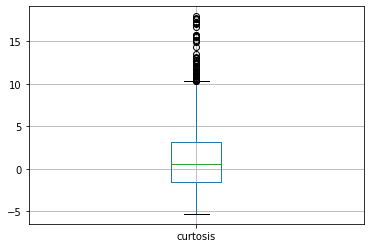

In [46]:
outlier(df,'curtosis')

variance    33
skewness    33
curtosis    33
entropy     33
class       33
dtype: int64
       variance  skewness  curtosis  entropy
class                                       
0            18        18        18       18
1            15        15        15       15


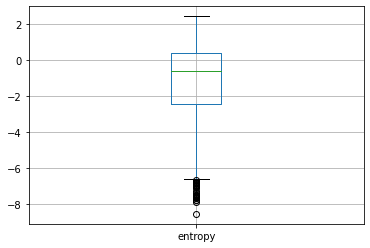

In [47]:
outlier(df,'entropy')

In [48]:
### Independent and Dependent Features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [49]:
### Train Test Split and validation split
from sklearn.model_selection import train_test_split
X_1,X_val,y_1,y_val = train_test_split(X,y,test_size=0.1, random_state= 42)
X_train,X_test,y_train,y_test = train_test_split(X_1,y_1,test_size=0.3, random_state= 42)

In [50]:
### Data Pre-processing to get features more gaussian using Power Transform (for -ve and +ve values)
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(X_train)                          ## Fit the PT on training data
X_train_trans = pt.transform(X_train)    ## Then apply on all data
X_test_trans = pt.transform(X_test)
X_val_trans = pt.transform(X_val)

In [51]:
### create another dataframe to check skewness of data pre and post transformation
X_train_trans_df = pd.DataFrame(X_train_trans, index=X_train.index, columns=X_train.columns)
X_test_trans_df = pd.DataFrame(X_test_trans, index=X_test.index, columns=X_test.columns)

In [52]:
print('Skewness in data pre-tranformation')
print('Skewness in column-variance : '+str(df['variance'].skew()))
print('Skewness in column-skewness : '+str(df['skewness'].skew()))
print('Skewness in column-curtosis : '+str(df['curtosis'].skew()))
print('Skewness in column-entropy : '+str(df['entropy'].skew()))

print('Skewness in data post-transformation')
print('Skewness in column-variance : '+str(X_train_trans_df['variance'].skew()))
print('Skewness in column-variance : '+str(X_train_trans_df['variance'].skew()))
print('Skewness in column-variance : '+str(X_train_trans_df['variance'].skew()))
print('Skewness in column-variance : '+str(X_train_trans_df['variance'].skew()))

Skewness in data pre-tranformation
Skewness in column-variance : -0.14938770055109987
Skewness in column-skewness : -0.39410347444624066
Skewness in column-curtosis : 1.088568543275335
Skewness in column-entropy : -1.0222430438083978
Skewness in data post-transformation
Skewness in column-variance : -0.06876526771459053
Skewness in column-variance : -0.06876526771459053
Skewness in column-variance : -0.06876526771459053
Skewness in column-variance : -0.06876526771459053


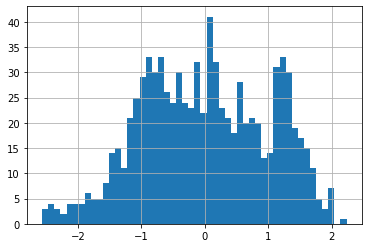

In [53]:
X_train_trans_df['variance'].hist(bins=50)

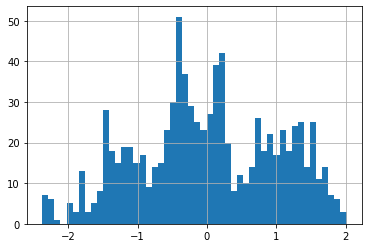

In [54]:
X_train_trans_df['skewness'].hist(bins=50)

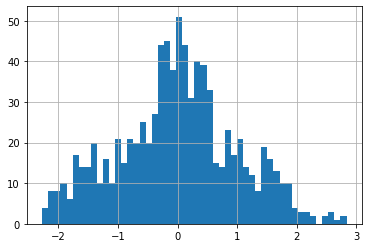

In [55]:
X_train_trans_df['curtosis'].hist(bins=50)

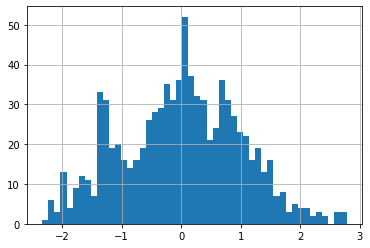

In [56]:
X_train_trans_df['entropy'].hist(bins=50)

In [57]:
### apply logistic regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_trans, y_train)
y_pred = model.predict(X_test_trans)
y_val_pred = model.predict(X_val_trans)

In [58]:
### validate performace of the model

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve

In [59]:
def performance(y_test,y_pred, model, X_test_trans):
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    print(confusion_matrix(y_test,y_pred))
    print(f1_score(y_test,y_pred))
    print(precision_score(y_test,y_pred))
    print(recall_score(y_test,y_pred))
    y_pred_proba = model.predict_proba(X_test_trans)[::,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()


1.0
[[218   0]
 [  0 153]]
1.0
1.0
1.0


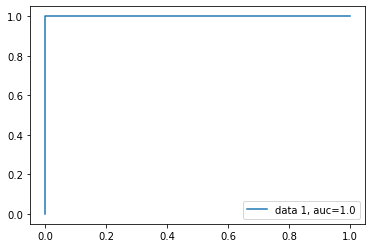

In [60]:
performance(y_test,y_pred,model, X_test_trans)


1.0
[[77  0]
 [ 0 61]]
1.0
1.0
1.0


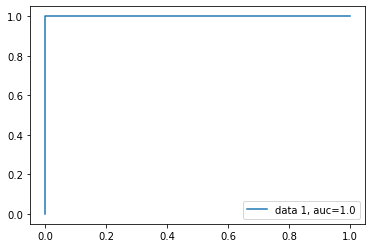

In [61]:
performance(y_val,y_val_pred,model, X_val_trans)